In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# CSV 파일 불러오기
data = pd.read_csv('../merged_dataset/single_train/single_train.csv')

In [3]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X = data[feature_columns].values
Y = data['Label'].values



# standardscaler로 데이터 정규화
scaler = StandardScaler()

X = scaler.fit_transform(X)

X=X.astype(int)
Y=Y.astype(int)


In [4]:
# 랜덤 포레스트 모델 생성 및 훈련
model = RandomForestClassifier()
model.fit(X, Y)


RandomForestClassifier()

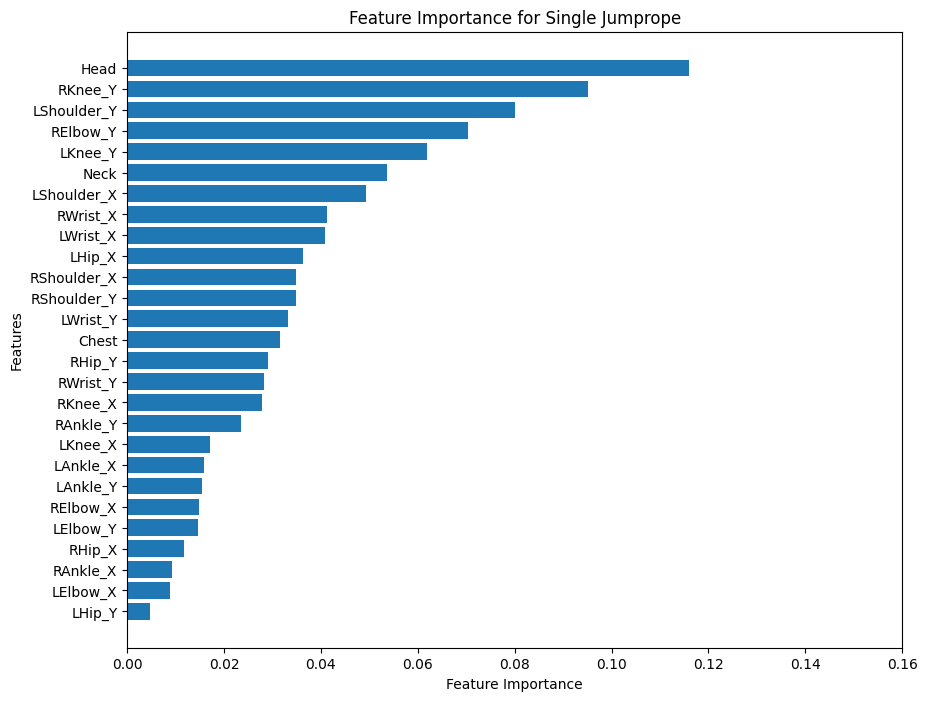

In [5]:
importance = model.feature_importances_

# 중요도를 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importance)[::1]

# 정렬된 인덱스를 기반으로 중요도와 특성 이름 추출
sorted_importance = importance[sorted_indices]
sorted_feature_columns = [feature_columns[i] for i in sorted_indices]

# 시각화
plt.figure(figsize=(10, 8))  
plt.barh(range(X.shape[1]), sorted_importance, tick_label=sorted_feature_columns)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.xticks(np.arange(0, 0.17, 0.02))
plt.title('Feature Importance for Single Jumprope')
plt.show()
